In [196]:
# Import Libraries-->
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans, AgglomerativeClustering

from sklearn.metrics import silhouette_score


In [197]:
restaurants=pd.read_csv('Zomato Restaurant names and Metadata.csv')
restaurants.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [198]:
reviews=pd.read_csv('Zomato Restaurant reviews.csv')
reviews.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [199]:
print(f'Shape of Restaurants:-{restaurants.shape}')
print(f'Shape of Reviews:-{reviews.shape}')

Shape of Restaurants:-(105, 6)
Shape of Reviews:-(10000, 7)


In [200]:
print(f'restaurants Columns:-{restaurants.columns}')
print(f'reviews Columns:-{reviews.columns}')

restaurants Columns:-Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')
reviews Columns:-Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')


In [201]:
# Review is object.. i want to convert in numeric coz i want to perform aggrigation..
reviews['Rating'].dtype
# convert to numeric
reviews['Rating']=pd.to_numeric(reviews['Rating'], errors='coerce')
# check null in review column..
reviews['Rating'].isna().sum()         #39 missing values
# drop missing records 
reviews = reviews.dropna(subset=['Rating'])

In [202]:
# Making the Name and Resturent_name same..
restaurants['Name_clean'] = restaurants['Name'].str.lower().str.strip()
reviews['Restaurant_clean'] = reviews['Restaurant'].str.lower().str.strip()


In [203]:
# Aggregate reviews
reviews_agg = (reviews.groupby('Restaurant_clean').agg(avg_rating=('Rating', 'mean'),total_reviews=('Rating', 'count')).reset_index())
# now each row= 1 restourant

In [204]:
# merging the datasets
df= pd.merge(restaurants,reviews_agg,left_on='Name_clean',right_on='Restaurant_clean',how='left')
#innner would drop restourants without ratings and i want all restourants for clustering thats why left..
df

,Name,Links,Cost,Collections,Cuisines,Timings,Name_clean,Restaurant_clean,avg_rating,total_reviews
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",beyond flavours,beyond flavours,4.28,100.0
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM,paradise,paradise,4.70,100.0
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM",flechazo,flechazo,4.66,100.0
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM,shah ghouse hotel & restaurant,shah ghouse hotel & restaurant,3.21,100.0
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...",over the moon brew company,over the moon brew company,4.34,100.0
...,...,...,...,...,...,...,...,...,...,...
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM,indiblaze,NaN,NaN,NaN
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr...",sweet basket,NaN,NaN,NaN
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM,angaara counts 3,NaN,NaN,NaN
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun),wich please,NaN,NaN,NaN


In [205]:
# Check the shapes..
print("Restaurants:", restaurants.shape)
print("Aggregated Reviews:", reviews_agg.shape)
print("merged:",df.shape)

Restaurants: (105, 7)
Aggregated Reviews: (100, 3)
merged: (105, 10)


In [206]:
df[['avg_rating', 'total_reviews']].isnull().sum()


avg_rating       5
total_reviews    5
dtype: int64

In [207]:
# Hndling Missing Values... 
df['avg_rating'].fillna(df['avg_rating'].median(), inplace=True)
df['total_reviews'].fillna(0, inplace=True)
df

C:\Users\hitesh\AppData\Local\Temp\ipykernel_24480\3371752692.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['avg_rating'].fillna(df['avg_rating'].median(), inplace=True)
C:\Users\hitesh\AppData\Local\Temp\ipykernel_24480\3371752692.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

,Name,Links,Cost,Collections,Cuisines,Timings,Name_clean,Restaurant_clean,avg_rating,total_reviews
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",beyond flavours,beyond flavours,4.280000,100.0
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM,paradise,paradise,4.700000,100.0
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM",flechazo,flechazo,4.660000,100.0
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM,shah ghouse hotel & restaurant,shah ghouse hotel & restaurant,3.210000,100.0
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...",over the moon brew company,over the moon brew company,4.340000,100.0
...,...,...,...,...,...,...,...,...,...,...
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM,indiblaze,NaN,3.613081,0.0
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr...",sweet basket,NaN,3.613081,0.0
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM,angaara counts 3,NaN,3.613081,0.0
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun),wich please,NaN,3.613081,0.0


In [208]:
# cost
df['Cost']=pd.to_numeric(df['Cost'],errors='coerce')
df['Cost'].fillna(df['Cost'].median(),inplace=True)

C:\Users\hitesh\AppData\Local\Temp\ipykernel_24480\443913928.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cost'].fillna(df['Cost'].median(),inplace=True)


Feature Engineering..

In [209]:
# Cuisines=cuisines_count.
df['cuisine_count'] =df['Cuisines'].apply(lambda x: len(str(x).split(',')))

In [210]:
# Collection Flag..
df['is_collection']=df['Collections'].notnull().astype(int)

In [211]:
# Review=log_transfomation...
df['log_reviews']=np.log1p(df['total_reviews'])

Feature Selection for Model..

In [212]:
features= df[['Cost','avg_rating','log_reviews','is_collection','cuisine_count']]

In [213]:
# Scaling the data- K-means is a distance based..
scaler=StandardScaler()
scaled_features=scaler.fit_transform(features)

[398.8998469714501, 324.8798267635806, 231.74933911643365, 209.02793706100857, 193.92067066914512, 157.44960501340006, 139.53521812249448, 131.94057749971677, 122.60767088945867]


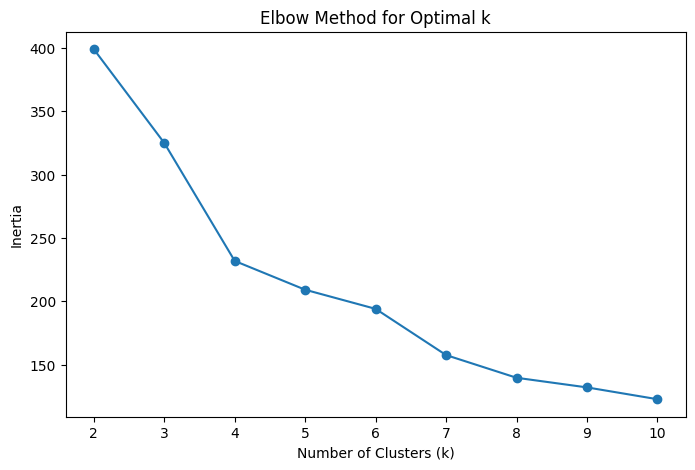

In [214]:
# Determine Optimal Number of Clusters :- Elbow_method 

inertia = []
k_range = range(2, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_features)
    inertia.append(km.inertia_)
print(inertia)
# Plot:-

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# K==4 Determined.....

K-Means Clustering algorithm..

In [215]:
# K=4 apply:-
km=KMeans(n_clusters=4,random_state=42)
df['kmeans_cluster']=km.fit_predict(scaled_features)

Hierarchical Clustering Algorithm..


In [216]:
hc=AgglomerativeClustering(n_clusters=4)
df['hc_cluster']=hc.fit_predict(scaled_features)

Cluster Interpretation:-K-Means

In [217]:
df.groupby('kmeans_cluster')[['Cost', 'avg_rating', 'total_reviews', 'cuisine_count']].mean()

,Cost,avg_rating,total_reviews,cuisine_count
kmeans_cluster,,,,
0,640.000000,3.603833,100.000000,3.100000
1,572.916667,3.794931,99.208333,3.500000
2,386.363636,3.181644,99.954545,1.818182
3,420.000000,3.613081,0.000000,2.400000


Cluster Interpretation:- AgglomerativeClustering

In [218]:
df.groupby('hc_cluster')[['Cost', 'avg_rating', 'total_reviews', 'cuisine_count']].mean()

,Cost,avg_rating,total_reviews,cuisine_count
hc_cluster,,,,
0,567.0,3.766933,99.24,3.44
1,390.0,3.147808,99.95,1.95
2,420.0,3.613081,0.00,2.40
3,635.0,3.632167,100.00,3.00


Both K-Means and Hierarchical clustering produced similar restaurant segments, which validates the robustness of the clustering.

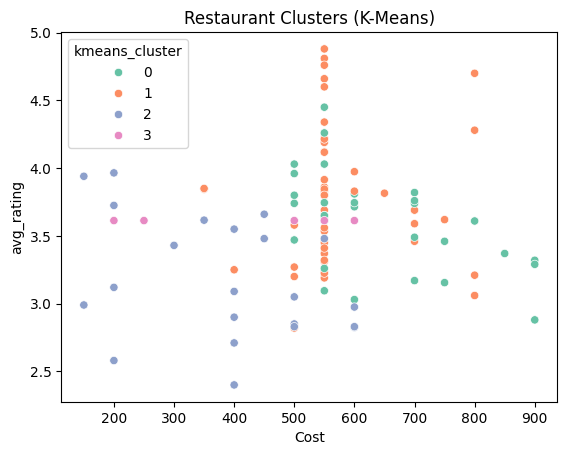

In [219]:
# Visuallizing Cluster..
sns.scatterplot(
    data=df,
    x='Cost',
    y='avg_rating',
    hue='kmeans_cluster',
    palette='Set2')
plt.title("Restaurant Clusters (K-Means)")
plt.show()

In [220]:
sil_score = silhouette_score(scaled_features, df['kmeans_cluster'])
print("Silhouette Score:", sil_score)
# 0.302  
# Both K-Means and Hierarchical clustering produced similar segments, which strengthens confidence despite a moderate silhouette score.

Silhouette Score: 0.3024169234874643
